<H1>Cab Company Investment EDA</H1>

<H2>Importing Libraries</H2>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import xlrd
from scipy import stats

<H2>Reading the datsets</H2>

In [2]:
cab_data=pd.read_csv('Cab_Data.csv')
city_data=pd.read_csv('City.csv')
customer_data=pd.read_csv('Customer_ID.csv')
transaction_data=pd.read_csv('Transaction_ID.csv')

<H1>Exploring the provided datasets</H1>

<H2>Cab Dataset:</H2>

In [3]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [6]:
cab_data.shape

(359392, 7)

<H2>Converting the'Date of Travel' attribute</H2>
Converting the date of travel attribute in cab dataset from xlrs format to datetime format

In [20]:
date_sample=[]
for x in range(len(cab_data)):
    py_date = xlrd.xldate.xldate_as_datetime(cab_data["Date of Travel"][x], 0)
    date_sample.append(py_date)
cab_data["Date of Travel"] = date_sample

In [29]:
cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [31]:
cab_data.describe(include='all')

C:\Users\shova\AppData\Local\Temp\ipykernel_32676\3389547832.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  cab_data.describe(include='all')


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392,359392,359392,359392.000000,359392.000000,359392.000000
unique,NaN,1095,2,19,NaN,NaN,NaN
top,NaN,2018-01-05 00:00:00,Yellow Cab,NEW YORK NY,NaN,NaN,NaN
freq,NaN,2022,274681,99885,NaN,NaN,NaN
first,NaN,2016-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,1.022076e+07,NaN,NaN,NaN,22.567254,423.443311,286.190113
std,1.268058e+05,NaN,NaN,NaN,12.233526,274.378911,157.993661
min,1.000001e+07,NaN,NaN,NaN,1.900000,15.600000,19.000000
25%,1.011081e+07,NaN,NaN,NaN,12.000000,206.437500,151.200000


In [32]:
#sorting the data set by 'Date of Travel':
cab_data=cab_data.sort_values(by=['Date of Travel'])
cab_data=cab_data.reset_index(drop= True )

In [33]:
cab_data.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10001340,2016-01-02,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640
1,10000640,2016-01-02,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640
2,10000635,2016-01-02,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752
3,10001001,2016-01-02,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960
4,10000171,2016-01-02,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840
5,10001009,2016-01-02,Yellow Cab,PHOENIX AZ,30.00,1000.52,403.2000
6,10000605,2016-01-02,Yellow Cab,CHICAGO IL,35.52,760.86,430.5024
7,10001014,2016-01-02,Yellow Cab,SACRAMENTO CA,38.00,1065.42,547.2000
8,10000600,2016-01-02,Yellow Cab,CHICAGO IL,23.75,531.25,336.3000
9,10000182,2016-01-02,Pink Cab,SAN DIEGO CA,2.36,47.89,23.6000


<H2>Transaction ID Dataset</H2>

In [35]:
transaction_data.head(1)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card


In [37]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [38]:
transaction_data.shape

(440098, 3)

In [39]:
transaction_data.describe(include='all')

,Transaction ID,Customer ID,Payment_Mode
count,4.400980e+05,440098.000000,440098
unique,NaN,NaN,2
top,NaN,NaN,Card
freq,NaN,NaN,263991
mean,1.022006e+07,23619.513120,NaN
std,1.270455e+05,21195.549816,NaN
min,1.000001e+07,1.000000,NaN
25%,1.011004e+07,3530.000000,NaN
50%,1.022006e+07,15168.000000,NaN
75%,1.033008e+07,43884.000000,NaN


<H1>City Dataset:</H1>

In [40]:
city_data.head(1)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"


In [64]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        20 non-null     object 
 1   Population  20 non-null     float64
 2   Users       20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes


In [43]:
city_data.shape

(20, 3)

<H2>Converting population and users data type: </H2>

In [46]:
# Attribute 'Population' should be an integer
city_data['Population'] = [x.replace(',','') for x in city_data['Population']]
city_data['Population'] = city_data['Population'].astype(float)

In [58]:
city_data['Users'] = [x.replace(',','') for x in city_data['Users']]
city_data['Users'] = city_data['Users'].astype(float)

<H2>Customer ID Dataset:</H2>

In [48]:
customer_data.head(1)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813


In [49]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [50]:
customer_data.shape

(49171, 4)

In [52]:
customer_data.describe(include='all')

,Customer ID,Gender,Age,Income (USD/Month)
count,49171.000000,49171,49171.000000,49171.000000
unique,NaN,2,NaN,NaN
top,NaN,Male,NaN,NaN
freq,NaN,26562,NaN,NaN
mean,28398.252283,NaN,35.363121,15015.631856
std,17714.137333,NaN,12.599066,8002.208253
min,1.000000,NaN,18.000000,2000.000000
25%,12654.500000,NaN,25.000000,8289.500000
50%,27631.000000,NaN,33.000000,14656.000000
75%,43284.500000,NaN,42.000000,21035.000000


<H1>Creating Master Dataset</H1>

In [60]:
master_data = cab_data.merge(transaction_data, on ='Transaction ID').merge(customer_data, on='Customer ID').merge(city_data, on='City')

In [66]:
master_data.head(1)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10001340,2016-01-02,Yellow Cab,WASHINGTON DC,10.2,202.54,135.864,52536,Card,Male,24,10606,418859.0,127001.0


In [56]:
master_data.shape

(359392, 15)

In [67]:
master_data.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                   float64
Users                        float64
dtype: object

<H1>EDA (Exploratory Data Analysis)</H1>

In [68]:
master_data.describe(include='all')

C:\Users\shova\AppData\Local\Temp\ipykernel_32676\3002844813.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  master_data.describe(include='all')


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
count,3.593920e+05,359392,359392,359392,359392.000000,359392.000000,359392.000000,359392.000000,359392,359392,359392.000000,359392.000000,3.593920e+05,359392.000000
unique,NaN,1095,2,19,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN
top,NaN,2018-01-05 00:00:00,Yellow Cab,NEW YORK NY,NaN,NaN,NaN,NaN,Card,Male,NaN,NaN,NaN,NaN
freq,NaN,2022,274681,99885,NaN,NaN,NaN,NaN,215504,205912,NaN,NaN,NaN,NaN
first,NaN,2016-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.022076e+07,NaN,NaN,NaN,22.567254,423.443311,286.190113,19191.652115,NaN,NaN,35.336705,15048.822937,3.132198e+06,158365.582267
std,1.268058e+05,NaN,NaN,NaN,12.233526,274.378911,157.993661,21012.412463,NaN,NaN,12.594234,7969.409482,3.315194e+06,100850.051020
min,1.000001e+07,NaN,NaN,NaN,1.900000,15.600000,19.000000,1.000000,NaN,NaN,18.000000,2000.000000,2.489680e+05,3643.000000
25%,1.011081e+07,NaN,NaN,NaN,12.000000,206.437500,151.200000,2705.000000,NaN,NaN,25.000000,8424.000000,6.712380e+05,80021.000000


In [69]:
master_data.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

<H2> Duplicate check </H2>

In [70]:
duplicated_rows = master_data[master_data.duplicated()]
print('Total number of duplicated rows is', duplicated_rows.shape[0])

Total number of duplicated rows is 0


### Correlations

In [71]:
master_data.corr()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570,0.023868,0.013526
KM Travelled,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544,-0.002311,-0.000428
Price Charged,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228,0.326589,0.281061
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633,0.015108,0.023628
Customer ID,-0.016912,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608,-0.647052,-0.610742
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907,-0.009002,-0.005906
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000,0.011868,0.010464
Population,0.023868,-0.002311,0.326589,0.015108,-0.647052,-0.009002,0.011868,1.000000,0.915490
Users,0.013526,-0.000428,0.281061,0.023628,-0.610742,-0.005906,0.010464,0.915490,1.000000


<AxesSubplot:>

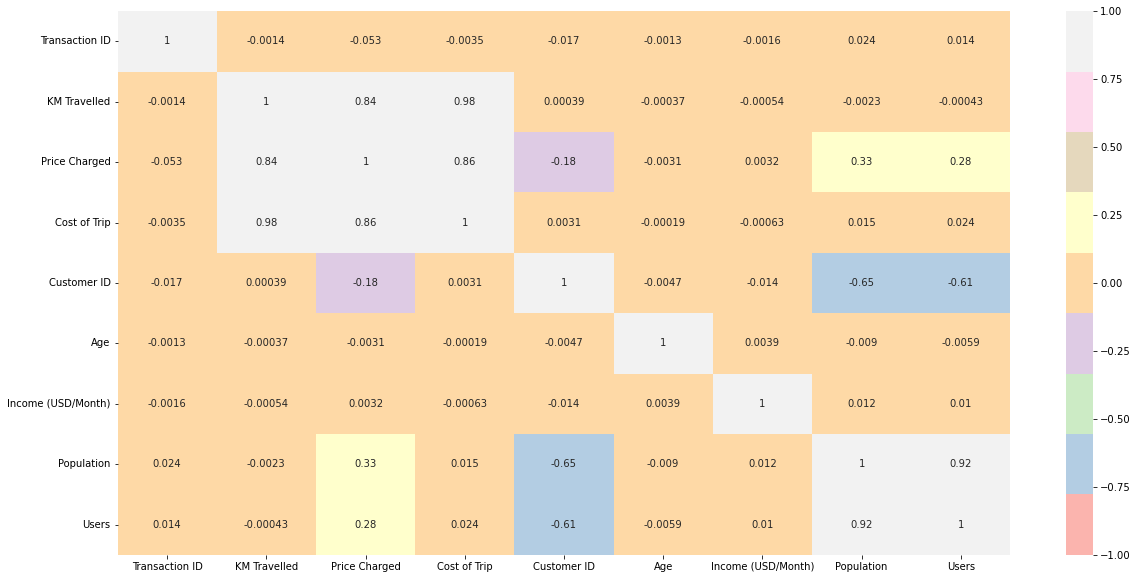

In [72]:
plt.figure(figsize=(20,10))
sns.heatmap(master_data.corr(),
            annot=True,
            vmin=-1,
            vmax=1,
            cmap="Pastel1")

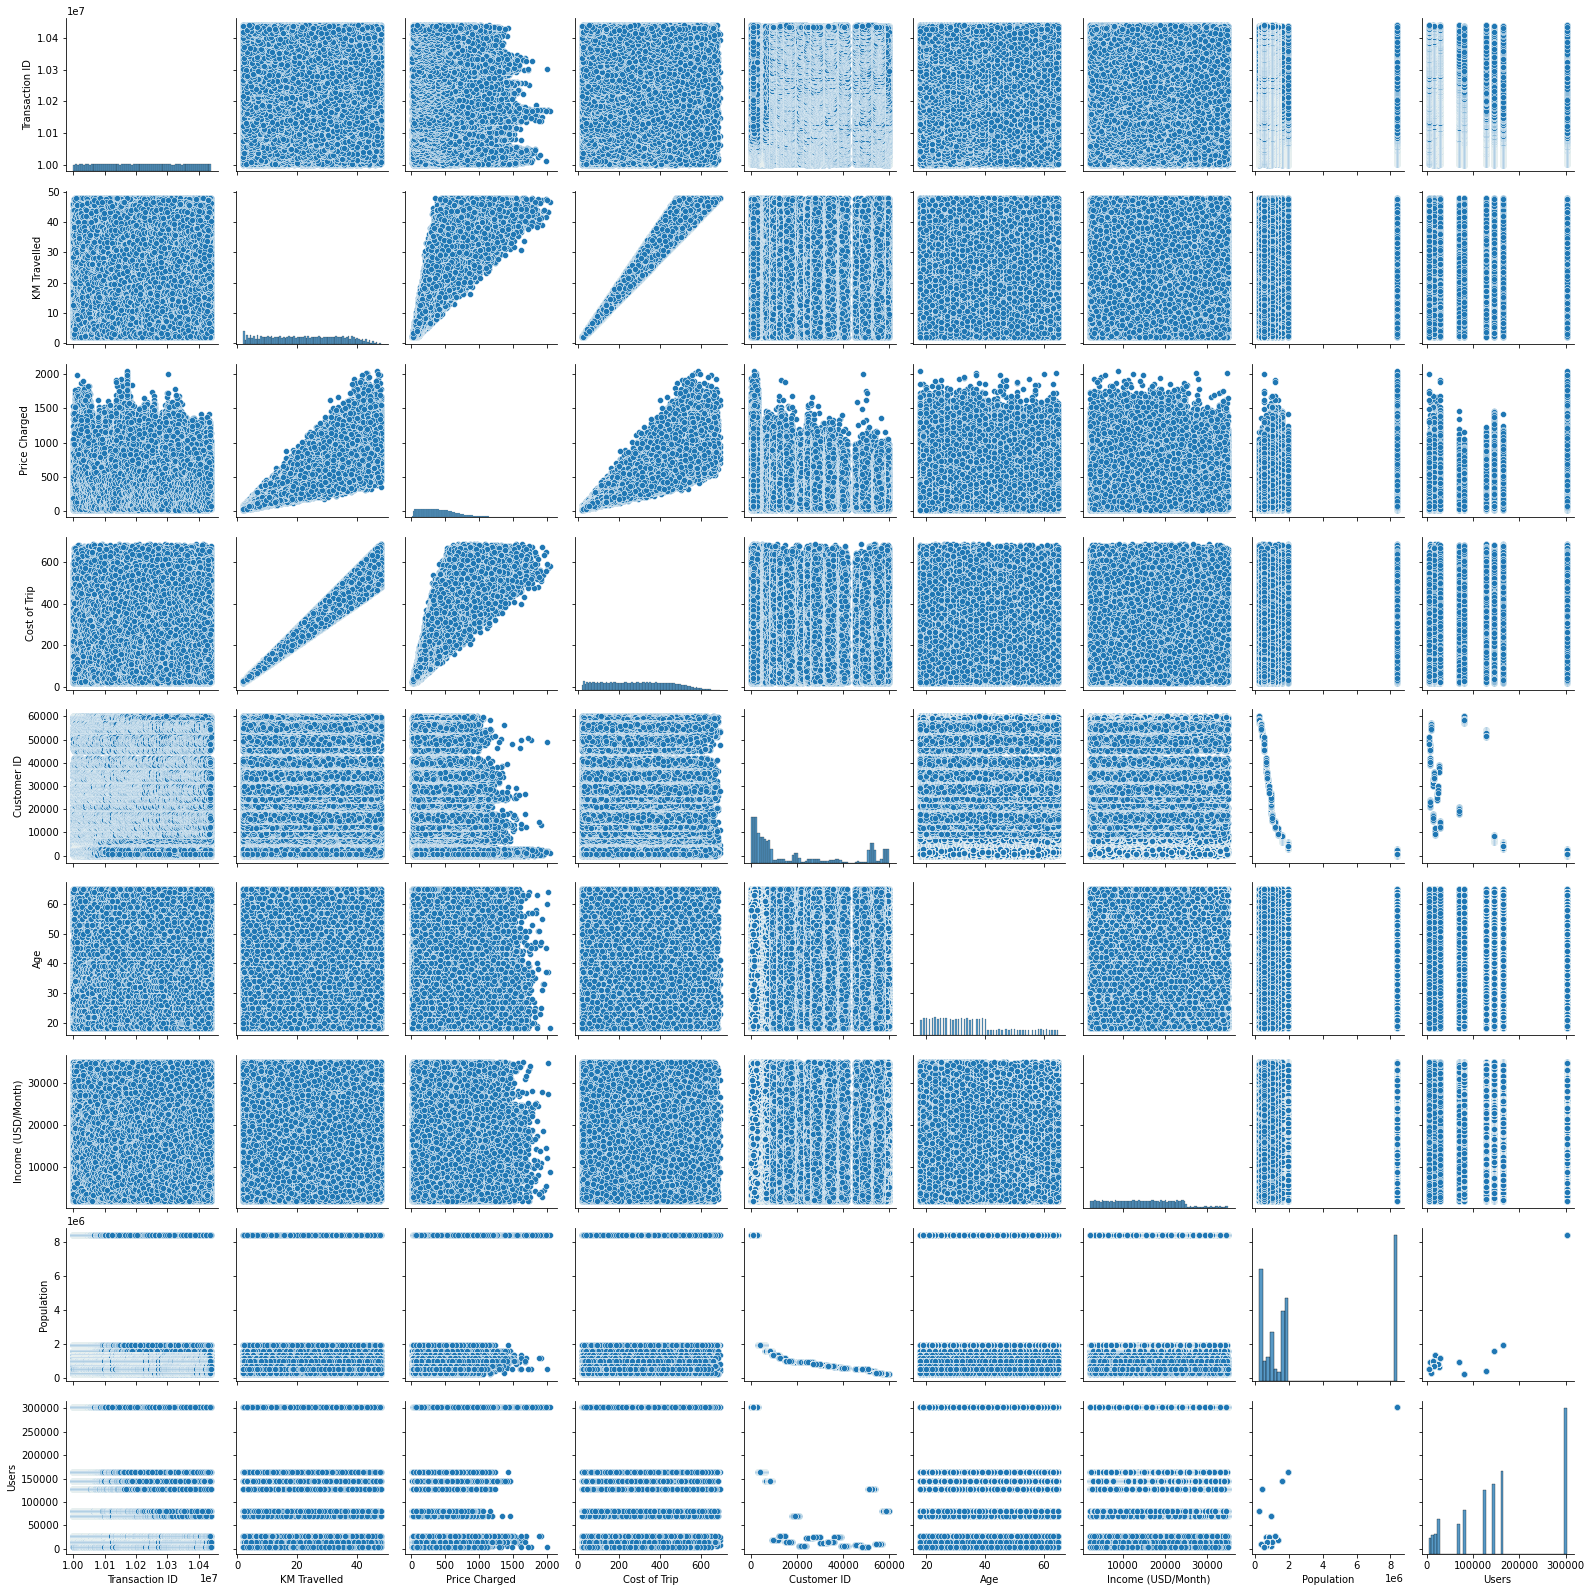

In [73]:
sns.pairplot(master_data)
plt.show()

Text(0.5, 0, 'Km Travelled')

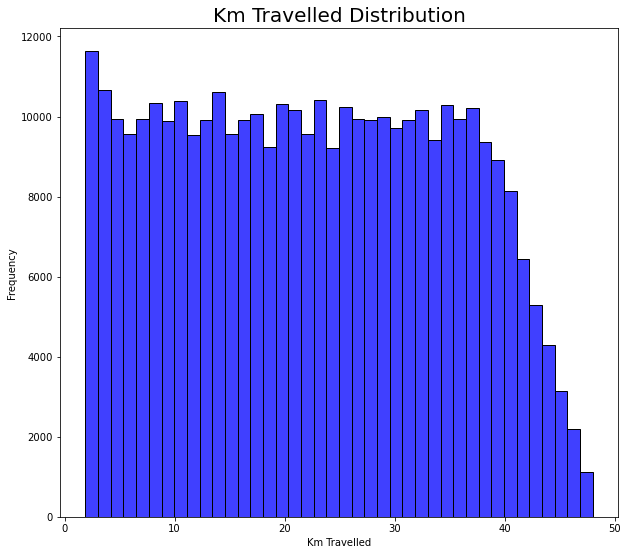

In [74]:
plt.figure(figsize=(10,9))
ax=sns.histplot(data=master_data, x="KM Travelled",bins=40, color= 'b')
plt.title('Km Travelled Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Km Travelled')

Most of the rides varies from 2 to 48 KM.

In [75]:
Pink = master_data[master_data['Company']=='Pink Cab']
Yellow = master_data[master_data['Company']=='Yellow Cab']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


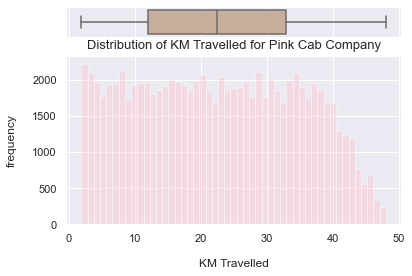

In [76]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_dist)
f, (ax_box, ax_dist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(Pink['KM Travelled'], palette= 'pink', ax=ax_box)
# sns.histplot(data=Pink, x="KM Travelled", ax=ax_hist)
sns.distplot(Pink['KM Travelled'], kde=False, color='pink', ax=ax_dist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

# setting title and labels
plt.title("Distribution of KM Travelled for Pink Cab Company", fontsize=13, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


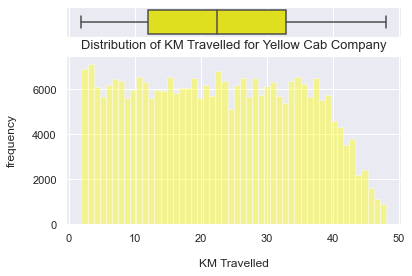

In [77]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_dist)
f, (ax_box, ax_dist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(Yellow['KM Travelled'], color= 'yellow', ax=ax_box)
# sns.histplot(data=Pink, x="KM Travelled", ax=ax_hist)
sns.distplot(Yellow['KM Travelled'], kde=False, color='yellow', ax=ax_dist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

# setting title and labels
plt.title("Distribution of KM Travelled for Yellow Cab Company", fontsize=13, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

###Price Charged:

Text(0.5, 0, 'Price Charged')

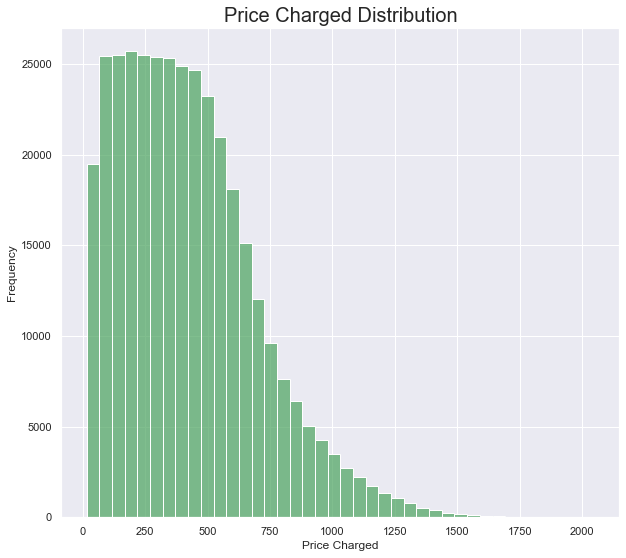

In [79]:
plt.figure(figsize=(10,9))
sns.histplot(data=master_data, x="Price Charged",bins=40 , color= 'g')
plt.title('Price Charged Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Price Charged')

In [80]:
p = [master_data['Price Charged'].min(), master_data['Price Charged'].max()]
print("The price charged for all rides ranges between :", p[0],'$','and',p[1], '$')

The price charged for all rides ranges between : 15.6 $ and 2048.03 $


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


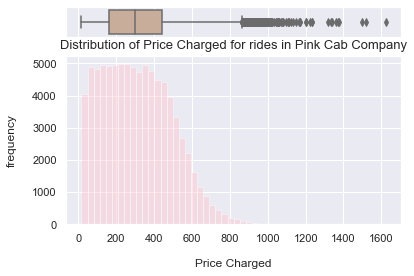

In [81]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_dist)
f, (ax_box, ax_dist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(Pink['Price Charged'], palette= 'pink', ax=ax_box)
# sns.histplot(data=Pink, x="KM Travelled", ax=ax_hist)
sns.distplot(Pink['Price Charged'], kde=False, color='pink', ax=ax_dist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

# setting title and labels
plt.title("Distribution of Price Charged for rides in Pink Cab Company", fontsize=13, y=1.012)
plt.xlabel("Price Charged", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

In [82]:
p = [Pink['Price Charged'].unique().min(), Pink['Price Charged'].unique().max()]
print("The price charged for Pink cab company ranges between :", p[0],'$','and',p[1], '$')

The price charged for Pink cab company ranges between : 15.6 $ and 1623.48 $


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


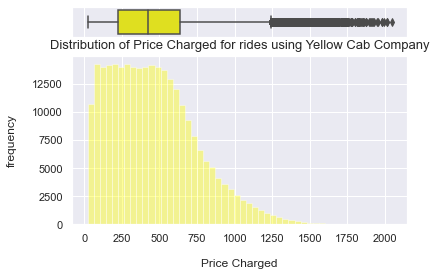

In [83]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_dist)
f, (ax_box, ax_dist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(Yellow['Price Charged'], color= 'yellow', ax=ax_box)
# sns.histplot(data=Pink, x="KM Travelled", ax=ax_hist)
sns.distplot(Yellow['Price Charged'], kde=False, color='yellow', ax=ax_dist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

# setting title and labels
plt.title("Distribution of Price Charged for rides using Yellow Cab Company", fontsize=13, y=1.012)
plt.xlabel("Price Charged", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

In [84]:
y = [Yellow['Price Charged'].unique().min(), Yellow['Price Charged'].unique().max()]
print("The price charged for Yellow cab company ranges between :", y[0],'$','and',y[1], '$')

The price charged for Yellow cab company ranges between : 20.73 $ and 2048.03 $


The price cahrged range for Yellow Cab company is higher than the Pink cab company.

###Cost of Trip:

Text(0.5, 0, 'Cost of Trip')

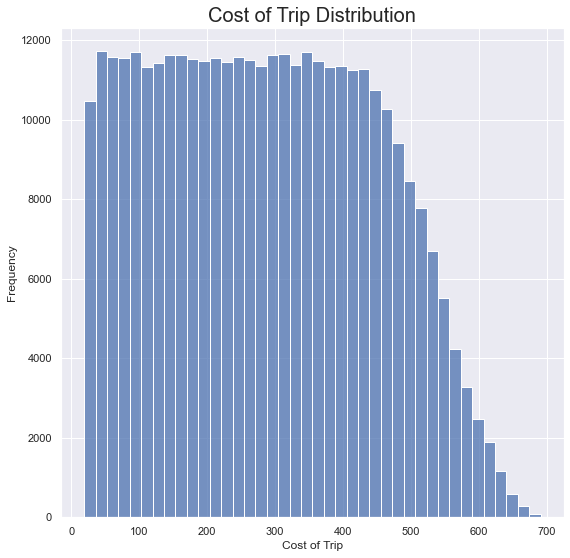

In [85]:
plt.figure(figsize=(9,9))
sns.histplot(data=master_data, x="Cost of Trip",bins=40 , color= 'b')
plt.title('Cost of Trip Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Cost of Trip')

In [86]:
c = [master_data['Cost of Trip'].unique().min(), master_data['Cost of Trip'].unique().max()]
print("The cost of trips ranges between :", c[0],'$','and',c[1], '$')

The cost of trips ranges between : 19.0 $ and 691.2 $


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


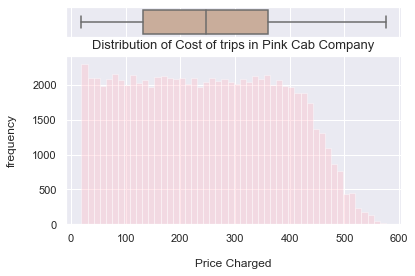

In [87]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_dist)
f, (ax_box, ax_dist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(Pink['Cost of Trip'], palette= 'pink', ax=ax_box)
# sns.histplot(data=Pink, x="KM Travelled", ax=ax_hist)
sns.distplot(Pink['Cost of Trip'], kde=False, color='pink', ax=ax_dist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

# setting title and labels
plt.title("Distribution of Cost of trips in Pink Cab Company", fontsize=13, y=1.012)
plt.xlabel("Price Charged", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

In [88]:
pc = [Pink['Cost of Trip'].unique().min(), Pink['Cost of Trip'].unique().max()]
print("The cost for Pink cab company ranges between :", pc[0],'$','and',pc[1], '$')

The cost for Pink cab company ranges between : 19.0 $ and 576.0 $


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


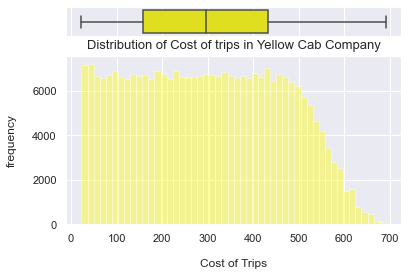

In [89]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_dist)
f, (ax_box, ax_dist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(Yellow['Cost of Trip'], color= 'yellow', ax=ax_box)
# sns.histplot(data=Pink, x="KM Travelled", ax=ax_hist)
sns.distplot(Yellow['Cost of Trip'], kde=False, color='yellow', ax=ax_dist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

# setting title and labels
plt.title("Distribution of Cost of trips in Yellow Cab Company", fontsize=13, y=1.012)
plt.xlabel("Cost of Trips", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

In [90]:
yc = [Yellow['Cost of Trip'].unique().min(), Yellow['Cost of Trip'].unique().max()]
print("The cost for Yellow cab company ranges between :", yc[0],'$','and',yc[1], '$')

The cost for Yellow cab company ranges between : 22.8 $ and 691.2 $


The Cost of Trip range for Yellow cab company is higher than the Pink cab company (expected since the price charged is also higher)

#### Payment mode:

Text(0.5, 0, 'Payment_Mode')

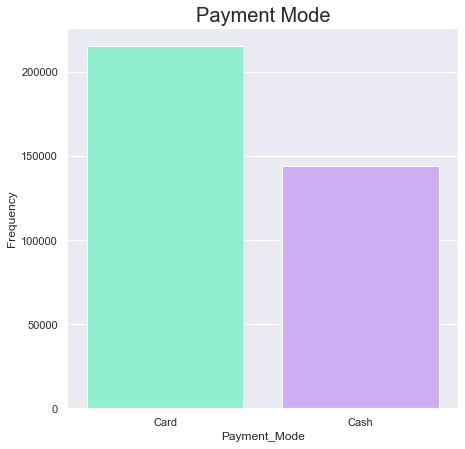

In [91]:
plt.figure(figsize=(7,7))
sns.countplot(data=master_data, x="Payment_Mode", palette=['#7FFFD4',"#cea2fd"])
plt.title('Payment Mode', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Payment_Mode')

Text(0.5, 1.0, 'Payment Mode in both companies')

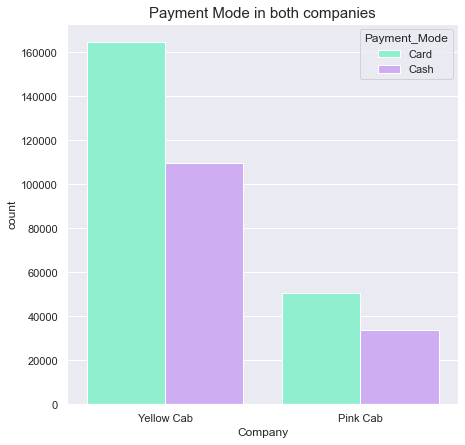

In [92]:
plt.figure(figsize=(7,7))
ax = sns.countplot(x="Company", hue="Payment_Mode", data=master_data, palette=['#7FFFD4',"#cea2fd"])
plt.title('Payment Mode in both companies', fontsize=15)

Cab users prefer to pay with card.

#### Gender:

Text(0.5, 0, 'sex')

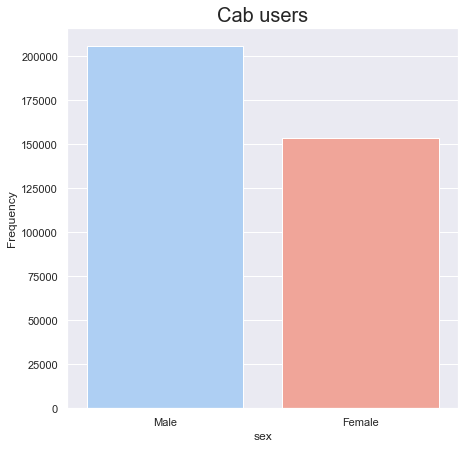

In [93]:
plt.figure(figsize=(7,7))
sns.countplot(data=master_data, x="Gender", palette=['#a2cffe',"#ff9a8a"])
plt.title('Cab users', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('sex')

Text(0.5, 1.0, 'Cab users in both companies')

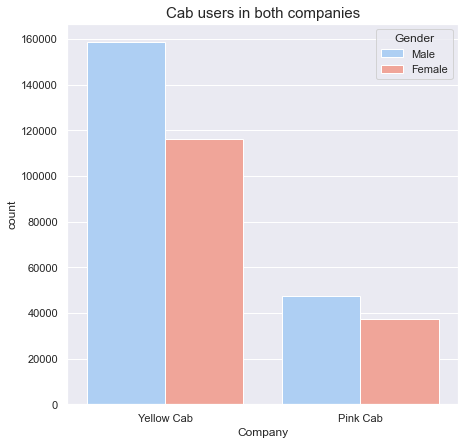

In [94]:
plt.figure(figsize=(7,7))
ax = sns.countplot(x="Company", hue="Gender", data=master_data, palette=['#a2cffe',"#ff9a8a"])
plt.title('Cab users in both companies', fontsize=15)

Looks like the majority of females prefer taking a Yellow Cab.  

### Time series Dataset:
##### Step 1: Let's split the attribute 'Date of Travel' into years, months and days

In [95]:
master_data['Year'] = master_data['Date of Travel'].dt.year
master_data['Month'] = master_data['Date of Travel'].dt.month
master_data['Day'] = master_data['Date of Travel'].dt.day

In [96]:
master_data.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                   float64
Users                        float64
Year                           int64
Month                          int64
Day                            int64
dtype: object

In [97]:
master_data_TS=master_data.set_index('Date of Travel')

In [98]:
master_data_TS.head(2)

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Year,Month,Day
Date of Travel,,,,,,,,,,,,,,,,
2016-01-02,10001340,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,52536,Card,Male,24,10606,418859.0,127001.0,2016,1,2
2016-03-26,10020018,Yellow Cab,WASHINGTON DC,5.94,88.50,74.1312,52536,Cash,Male,24,10606,418859.0,127001.0,2016,3,26


In [99]:
master_data_TS.sort_values('Date of Travel').head(2)

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Year,Month,Day
Date of Travel,,,,,,,,,,,,,,,,
2016-01-02,10001340,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,52536,Card,Male,24,10606,418859.0,127001.0,2016,1,2
2016-01-02,10001254,Yellow Cab,SILICON VALLEY,42.12,1342.05,520.6032,13894,Card,Male,32,21898,1177609.0,27247.0,2016,1,2


##### Step 2: Let's rename some columns

In [100]:
for col in master_data_TS.columns:
    if ' ' in col:
        master_data_TS = master_data_TS.rename(columns={col:col.replace(' ','_')})

In [101]:
master_data_TS.columns

Index(['Transaction_ID', 'Company', 'City', 'KM_Travelled', 'Price_Charged',
       'Cost_of_Trip', 'Customer_ID', 'Payment_Mode', 'Gender', 'Age',
       'Income_(USD/Month)', 'Population', 'Users', 'Year', 'Month', 'Day'],
      dtype='object')

##### Step 3: Let's split the dataset for each company

In [102]:
PinkCab_data = master_data_TS[master_data_TS['Company']=='Pink Cab']
YellowCab_data = master_data_TS[master_data_TS['Company']=='Yellow Cab']

In [103]:
PinkCab_data.shape, YellowCab_data.shape

((84711, 16), (274681, 16))

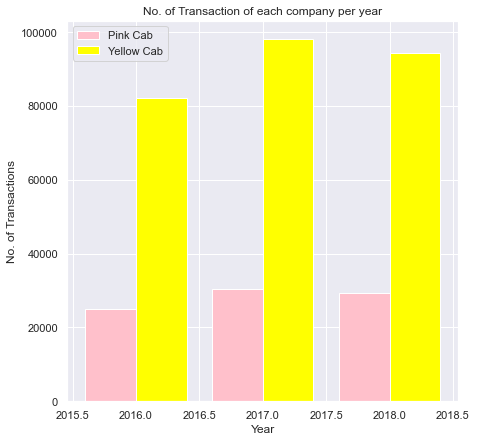

In [104]:
plot1 = PinkCab_data.groupby('Year').Transaction_ID.count()
plot2 = YellowCab_data.groupby('Year').Transaction_ID.count()
plt.figure(figsize=(7,7))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1.values, width=0.4, color='pink', align='center',label='Pink Cab')
ax.bar(plot2.index+0.2, plot2.values, width=0.4, color='yellow', align='center',label='Yellow Cab')
plt.title('No. of Transaction of each company per year')
plt.ylabel('No. of Transactions')
plt.xlabel('Year')
plt.legend()
plt.show()

The Yellow Cab company looks more active than the Pink Cab company.

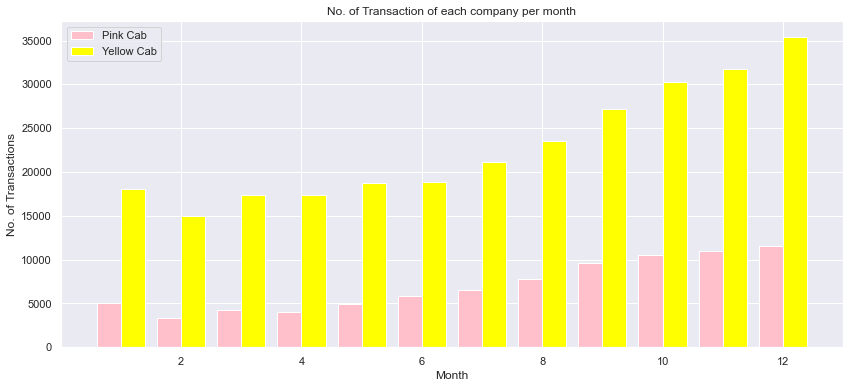

In [105]:
plot1 = PinkCab_data.groupby('Month').Transaction_ID.count()
plot2 = YellowCab_data.groupby('Month').Transaction_ID.count()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1.values, width=0.4, color='pink', align='center',label='Pink Cab')
ax.bar(plot1.index+0.2, plot2.values, width=0.4, color='yellow', align='center',label='Yellow Cab')
plt.title('No. of Transaction of each company per month')
plt.ylabel('No. of Transactions')
plt.xlabel('Month')
plt.legend()
plt.show()

As we can see from this bar plot, Yellow Cab company is in high demand than the pink cab company especially during Holiday season.

### Profit Analysis:
Let's add a new column to our dataset where we calculate the margin between 'Price_Charged' and 'Cost_of_Trip' and call it 'Profit'.

In [106]:
master_data_TS['Profit'] = master_data_TS['Price_Charged'] - master_data_TS['Cost_of_Trip']

In [107]:
master_data_TS.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Year,Month,Day,Profit
Date of Travel,,,,,,,,,,,,,,,,,
2016-01-02,10001340,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,52536,Card,Male,24,10606,418859.0,127001.0,2016,1,2,66.6760
2016-03-26,10020018,Yellow Cab,WASHINGTON DC,5.94,88.50,74.1312,52536,Cash,Male,24,10606,418859.0,127001.0,2016,3,26,14.3688
2016-11-09,10102932,Pink Cab,WASHINGTON DC,15.21,179.33,153.6210,52536,Cash,Male,24,10606,418859.0,127001.0,2016,11,9,25.7090
2017-04-17,10164725,Yellow Cab,WASHINGTON DC,8.08,123.21,104.7168,52536,Card,Male,24,10606,418859.0,127001.0,2017,4,17,18.4932
2017-06-24,10188478,Yellow Cab,WASHINGTON DC,13.80,283.74,168.9120,52536,Cash,Male,24,10606,418859.0,127001.0,2017,6,24,114.8280


In [108]:
a = master_data_TS.groupby(['Company', 'Year']).Profit.sum().to_frame('Profit')

In [109]:
b = master_data_TS.groupby(['Company', 'Year'])['Price_Charged'].sum().to_frame('Price')

In [110]:
b['%Profit'] =(a['Profit']*100) /b['Price']

Text(0.5, 1.0, 'Profit % per year')

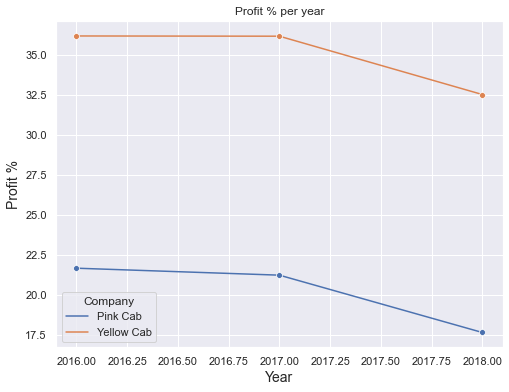

In [111]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Year', y='%Profit', hue="Company", data=b, marker='o')
plt.xlabel("Year", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per year")

Text(0.5, 1.0, 'Prices per year')

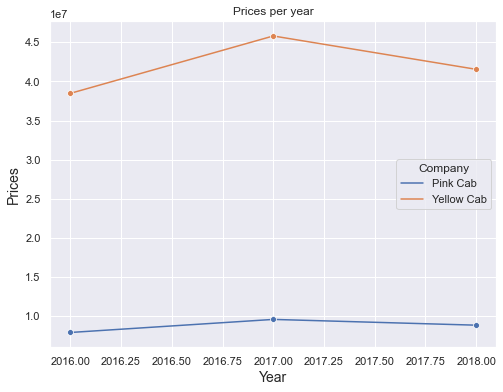

In [112]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Year', y='Price', hue="Company", data=b, marker='o')
plt.xlabel("Year", size=14)
plt.ylabel("Prices", size=14)
plt.title('Prices per year')

In [113]:
PinkCab_data['Profit'] = PinkCab_data['Price_Charged'] - PinkCab_data['Cost_of_Trip']
YellowCab_data['Profit'] = YellowCab_data['Price_Charged'] - YellowCab_data['Cost_of_Trip']

C:\Users\shova\AppData\Local\Temp\ipykernel_32676\653891366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PinkCab_data['Profit'] = PinkCab_data['Price_Charged'] - PinkCab_data['Cost_of_Trip']
C:\Users\shova\AppData\Local\Temp\ipykernel_32676\653891366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  YellowCab_data['Profit'] = YellowCab_data['Price_Charged'] - YellowCab_data['Cost_of_Trip']


In [114]:
round(master_data_TS.groupby(['Company']).Profit.sum().to_frame('Total Profit'),0)

,Total Profit
Company,
Pink Cab,5307328.0
Yellow Cab,44020373.0


YellowCab's profits over the last 3 years are eight times higher than PinkCab's Company

In [115]:
c = master_data_TS.groupby(['Company', 'Month']).Profit.sum().to_frame('Profit')

In [116]:
d = master_data_TS.groupby(['Company', 'Month'])['Price_Charged'].sum().to_frame('Price')

In [117]:
d['%Profit'] =(c['Profit']*100) / d['Price']

Text(0.5, 1.0, 'Profit % per Month')

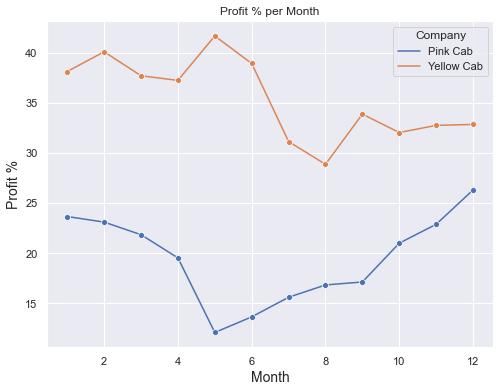

In [118]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Month', y='%Profit', hue="Company", data=d, marker='o')
plt.xlabel("Month", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per Month")

Text(0.5, 1.0, 'Prices per Month')

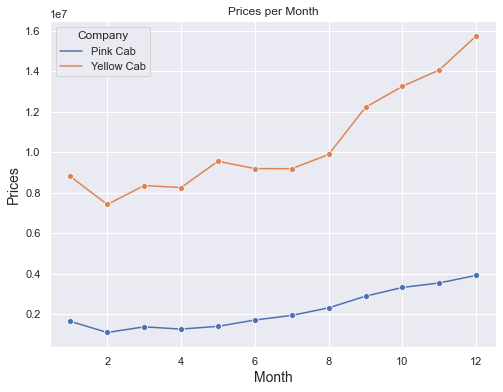

In [119]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Month', y='Price', hue="Company", data=d, marker='o')
plt.xlabel("Month", size=14)
plt.ylabel("Prices", size=14)
plt.title('Prices per Month')

In [120]:
df_yellow_profit = YellowCab_data.Profit.resample('m').sum().to_frame('Profit')

In [121]:
mean_y = round(df_yellow_profit.Profit.mean(),2) 
std_y = round(df_yellow_profit.Profit.std(),2)

In [122]:
print('The percentage of the Profit deviation for the Yellow Cab company is', round((std_y / mean_y)*100,2),'%')

The percentage of the Profit deviation for the Yellow Cab company is 23.07 %


In [123]:
df_pink_profit = PinkCab_data.Profit.resample('m').sum().to_frame('Profit')

In [124]:
mean_p = round(df_pink_profit.Profit.mean(),2) 
std_p = round(df_pink_profit.Profit.std(),2)

In [125]:
print('The percentage of the Profit deviation for the Pink Cab company is', round((std_p / mean_p)*100,2),'%')

The percentage of the Profit deviation for the Pink Cab company is 61.09 %


YellowCab Company's earnings are more stable, with fluctuations of 23,07%, while those of the PinkCab Company's vary in the order of 61,09%

#### Analysis by city

In [126]:
df_city_users = master_data_TS.groupby('City').Users.count()
df_city_users

City
ATLANTA GA         7557
AUSTIN TX          4896
BOSTON MA         29692
CHICAGO IL        56625
DALLAS TX          7017
DENVER CO          3825
LOS ANGELES CA    48033
MIAMI FL           6454
NASHVILLE TN       3010
NEW YORK NY       99885
ORANGE COUNTY      3982
PHOENIX AZ         2064
PITTSBURGH PA      1313
SACRAMENTO CA      2367
SAN DIEGO CA      20488
SEATTLE WA         7997
SILICON VALLEY     8519
TUCSON AZ          1931
WASHINGTON DC     43737
Name: Users, dtype: int64

In [127]:
df_city_y = YellowCab_data.groupby('City').Users.count()
df_city_y

City
ATLANTA GA         5795
AUSTIN TX          3028
BOSTON MA         24506
CHICAGO IL        47264
DALLAS TX          5637
DENVER CO          2431
LOS ANGELES CA    28168
MIAMI FL           4452
NASHVILLE TN       1169
NEW YORK NY       85918
ORANGE COUNTY      2469
PHOENIX AZ         1200
PITTSBURGH PA       631
SACRAMENTO CA      1033
SAN DIEGO CA       9816
SEATTLE WA         5265
SILICON VALLEY     4722
TUCSON AZ          1132
WASHINGTON DC     40045
Name: Users, dtype: int64

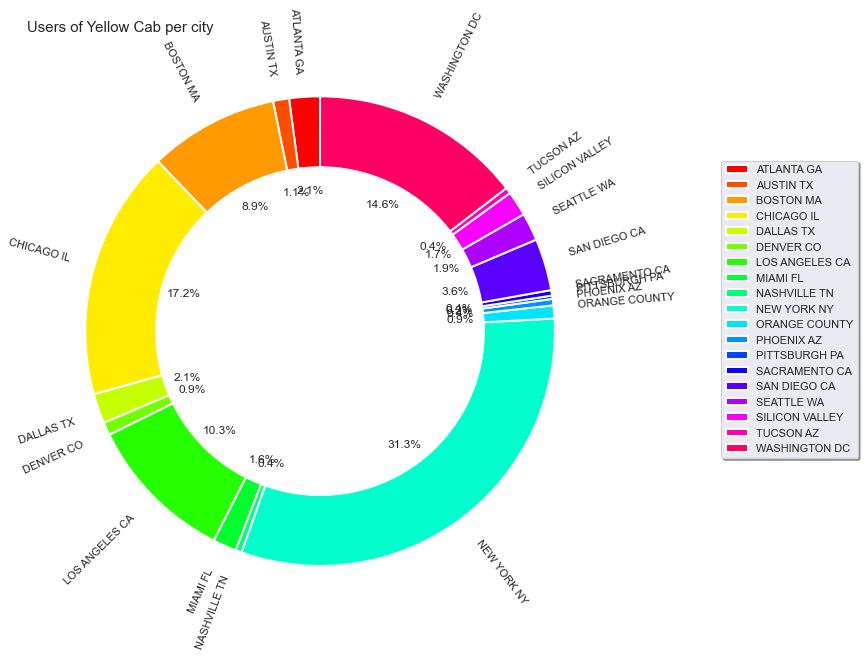

In [128]:
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.70, color='white')

# Custom wedges
fig, ax = plt.subplots(figsize=(9,9))

# set a theme for colors
theme = plt.get_cmap('hsv')
ax.set_prop_cycle("color", [theme(1. * i / len(df_city_y.values))
                             for i in range(len(df_city_y.values))])

ax.pie(df_city_y.values, 
       labels=df_city_y.index, 
       wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, 
       startangle=90, 
       autopct='%1.1f%%', 
       rotatelabels=True)

p = plt.gcf()
p.gca().add_artist(my_circle)

# set the legend 
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.30, 0.8), shadow=True, ncol=1)

plt.title("Users of Yellow Cab per city", fontsize=15, loc='left')
plt.tight_layout()
plt.show()

In [129]:
df_city_p = PinkCab_data.groupby('City').Users.count()
df_city_p

City
ATLANTA GA         1762
AUSTIN TX          1868
BOSTON MA          5186
CHICAGO IL         9361
DALLAS TX          1380
DENVER CO          1394
LOS ANGELES CA    19865
MIAMI FL           2002
NASHVILLE TN       1841
NEW YORK NY       13967
ORANGE COUNTY      1513
PHOENIX AZ          864
PITTSBURGH PA       682
SACRAMENTO CA      1334
SAN DIEGO CA      10672
SEATTLE WA         2732
SILICON VALLEY     3797
TUCSON AZ           799
WASHINGTON DC      3692
Name: Users, dtype: int64

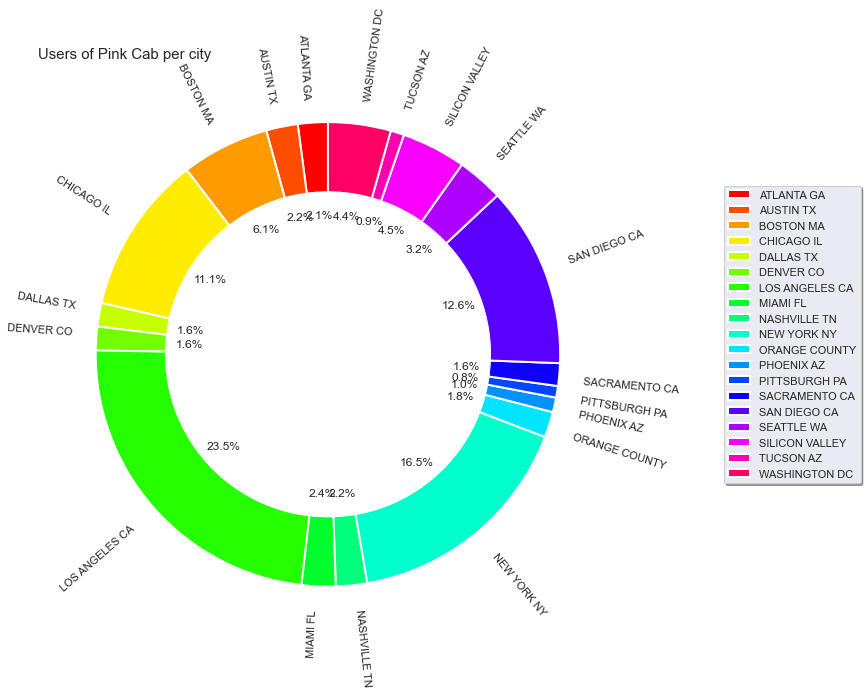

In [130]:
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
fig, ax = plt.subplots(figsize=(9,9))

# set a theme for colors
theme = plt.get_cmap('hsv')
ax.set_prop_cycle("color", [theme(1. * i / len(df_city_p.values))
                             for i in range(len(df_city_p.values))])

ax.pie(df_city_p.values, 
       labels=df_city_p.index, 
       wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, 
       startangle=90, 
       autopct='%1.1f%%', 
       rotatelabels=True)

p = plt.gcf()
p.gca().add_artist(my_circle)

# set the legend
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.30, 0.8), shadow=True, ncol=1)

plt.title('Users of Pink Cab per city', fontsize=15, loc='left')
plt.tight_layout()
plt.show()

Transaction for Yellow Cab is highest in New York City which has the highest Cab Users of 28%

Transaction for Pink Cab is highest in Los Angeles City

In [131]:
df_city_p = PinkCab_data.groupby('City').Users.count()
df_city_p.values.max()

19865

In [132]:
pp = df_city_p.to_frame()
ppp = pp.reset_index()
ppp

,City,Users
0,ATLANTA GA,1762
1,AUSTIN TX,1868
2,BOSTON MA,5186
3,CHICAGO IL,9361
4,DALLAS TX,1380
5,DENVER CO,1394
6,LOS ANGELES CA,19865
7,MIAMI FL,2002
8,NASHVILLE TN,1841
9,NEW YORK NY,13967


Text(0.5, 1.0, 'Yellow Cab Profits over City')

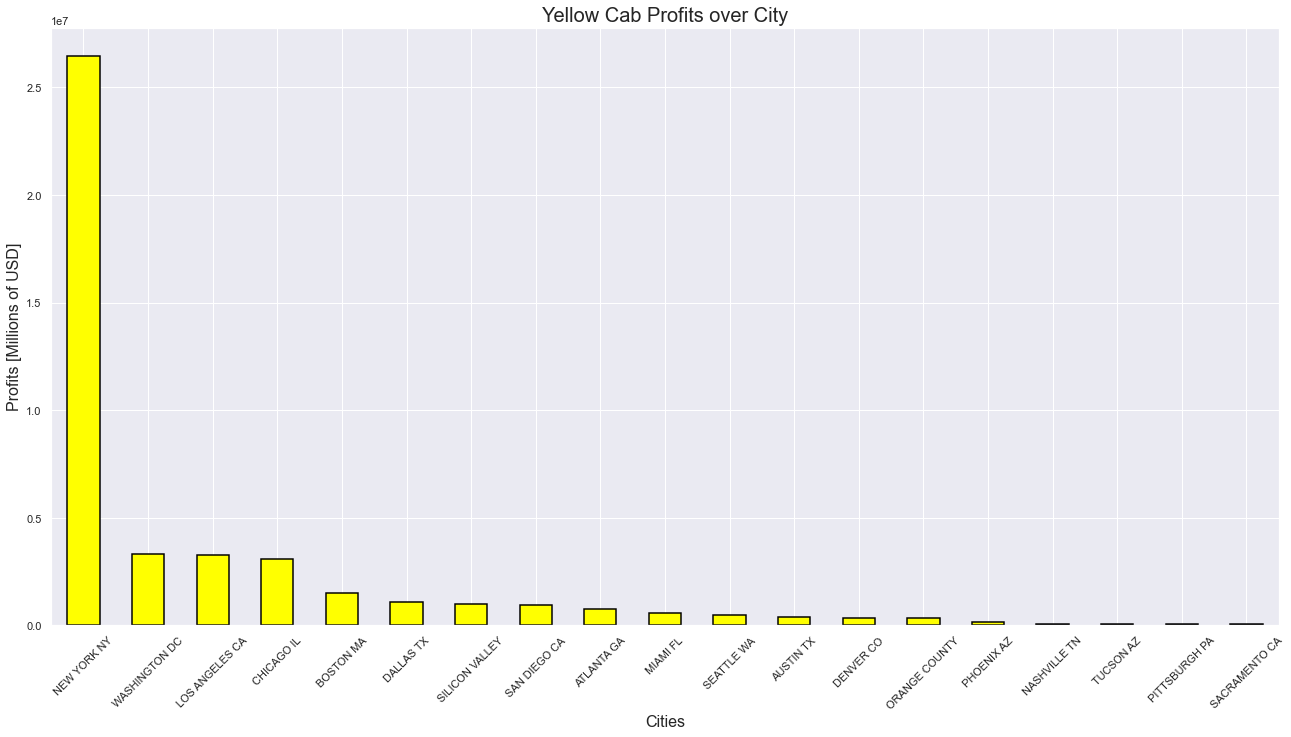

In [133]:
yellow_profit_city = YellowCab_data.groupby('City').Profit.sum()
yellow_profit_city = pd.DataFrame(yellow_profit_city)
yellow_profit_city = yellow_profit_city.sort_values(by='Profit', ascending= False )


plt.figure(figsize=(22,11))
fig= yellow_profit_city.Profit.plot.bar(color = 'yellow',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel('Profits [Millions of USD]', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Yellow Cab Profits over City',fontsize=20)

Text(0.5, 1.0, 'Pink Cab Profits over City')

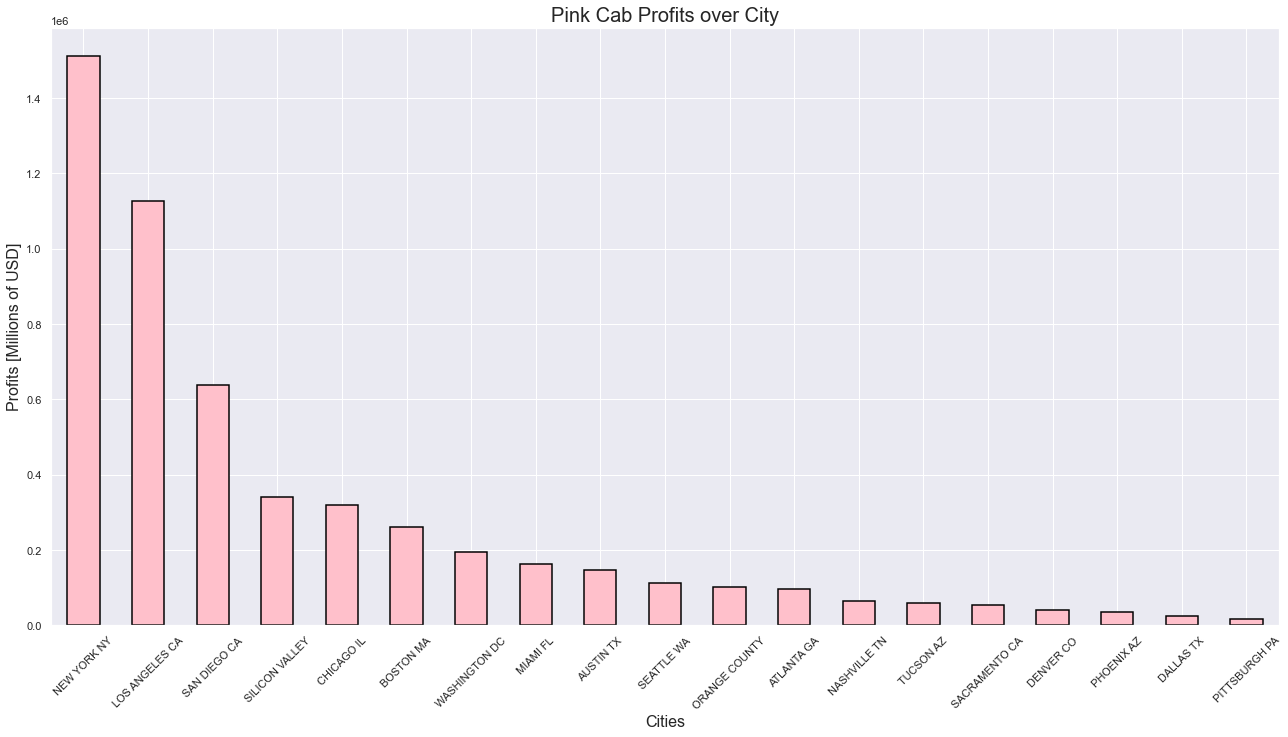

In [134]:
pink_profit_city = PinkCab_data.groupby('City').Profit.sum()
pink_profit_city = pd.DataFrame(pink_profit_city)
pink_profit_city = pink_profit_city.sort_values(by='Profit', ascending= False )


plt.figure(figsize=(22,11))
fig= pink_profit_city.Profit.plot.bar(color = 'pink',edgecolor='black',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel('Profits [Millions of USD]', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Pink Cab Profits over City',fontsize=20)

In [135]:
df_gender_y = YellowCab_data.groupby('Gender').Price_Charged.mean()
df_gender_y

Gender
Female    454.571538
Male      460.821326
Name: Price_Charged, dtype: float64

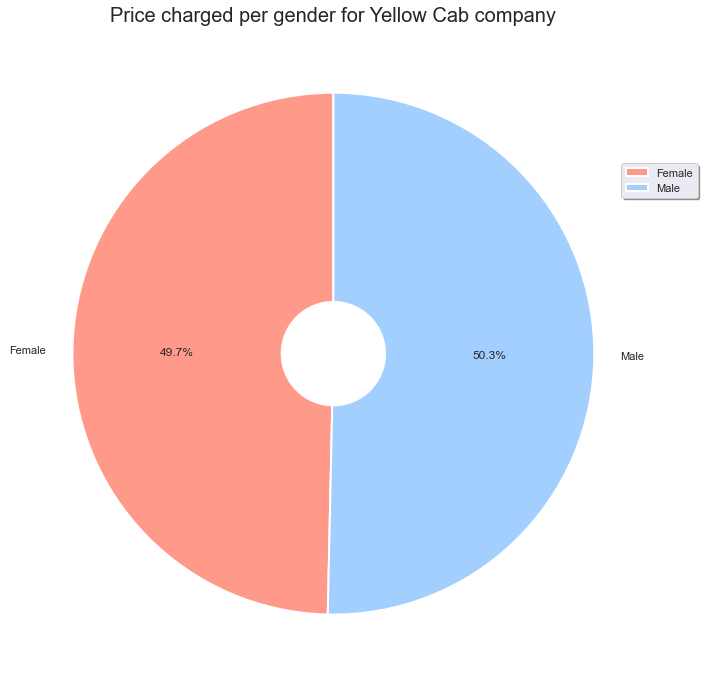

In [136]:
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.2, color='white')

# Custom wedges
fig, ax = plt.subplots(figsize=(20,20))

ax.pie(df_gender_y.values, 
       labels=df_gender_y.index, 
       wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, 
       startangle=90, 
       autopct='%1.1f%%',
       colors=["#ff9a8a","#a2cffe"])

p = plt.gcf()
p.gca().add_artist(my_circle)

chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.0, 0.8), shadow=True, ncol=1)

plt.title('Price charged per gender for Yellow Cab company', fontsize=20)
plt.show()

In [137]:
df_gender_p = PinkCab_data.groupby('Gender').Price_Charged.mean()
df_gender_p

Gender
Female    310.624823
Male      310.940547
Name: Price_Charged, dtype: float64

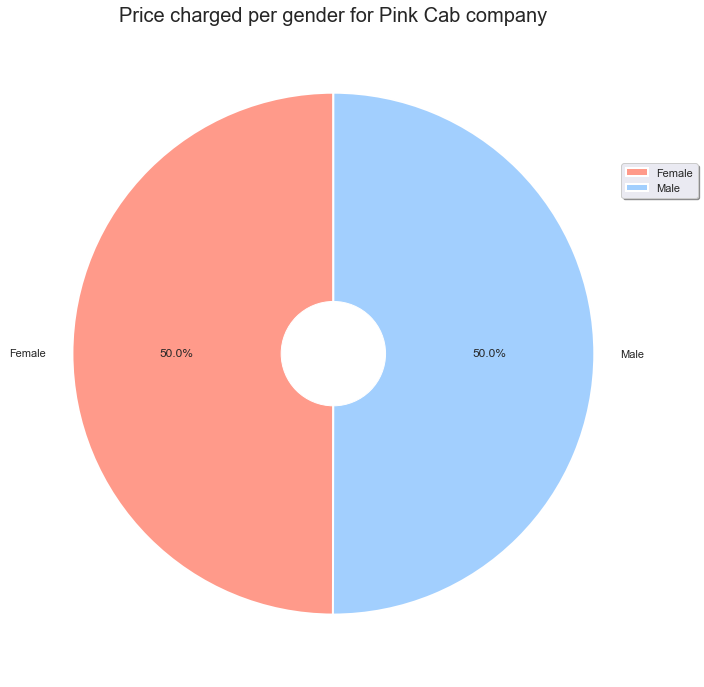

In [138]:
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.2, color='white')

# Custom wedges
fig, ax = plt.subplots(figsize=(20,20))

ax.pie(df_gender_p.values, 
       labels=df_gender_p.index, 
       wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, 
       startangle=90, 
       autopct='%1.1f%%',
       colors=["#ff9a8a","#a2cffe"])

p = plt.gcf()
p.gca().add_artist(my_circle)

chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.0, 0.8), shadow=True, ncol=1)

plt.title('Price charged per gender for Pink Cab company', fontsize=20)
plt.show()

Yellow Cab charge less from Female Customers whereas Pink Cab charges same for both Male and Female Customers.

In [139]:
gender_cab=master_data_TS.groupby(['Company','Gender']).Customer_ID.nunique()
gender_cab

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer_ID, dtype: int64

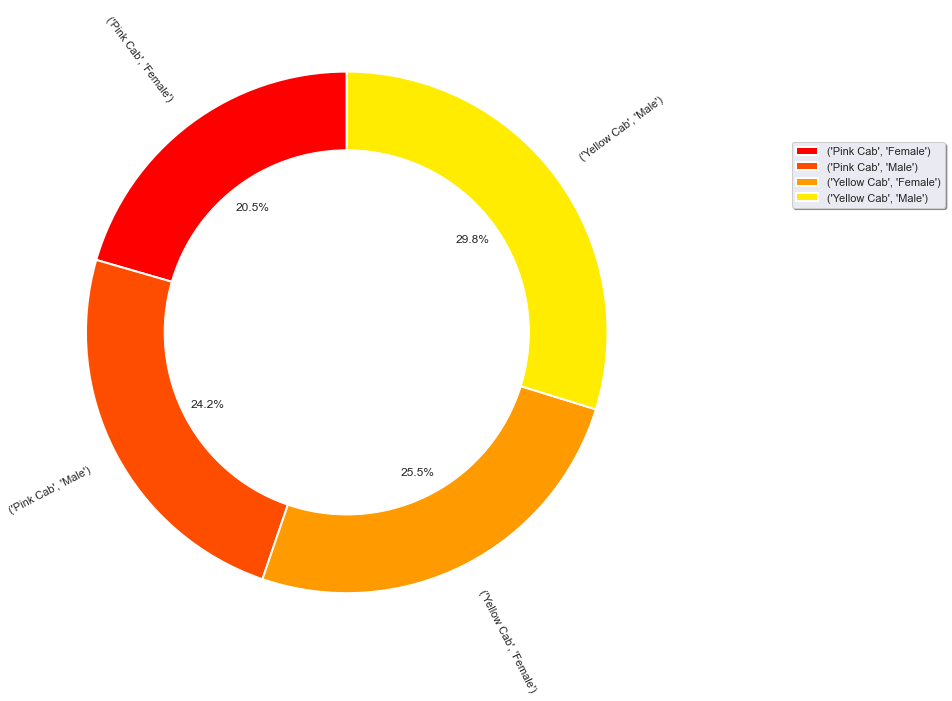

In [140]:
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Custom wedges
fig, ax = plt.subplots(figsize=(10,10))

# set a theme for colors
theme = plt.get_cmap('hsv')
ax.set_prop_cycle("color", [theme(1. * i / len(df_city_p.values))
                             for i in range(len(df_city_p.values))])

ax.pie(gender_cab.values, 
       labels=gender_cab.index, 
       wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, 
       startangle=90, 
       autopct='%1.1f%%', 
       rotatelabels=True)

p = plt.gcf()
p.gca().add_artist(my_circle)

# set the legend
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*0.6, chartBox.height])
ax.legend(loc='upper center', bbox_to_anchor=(1.30, 0.8), shadow=True, ncol=1)

plt.title('')
plt.tight_layout()
plt.show()

Female Customers in Yellow Cab is higher compared to female customers in Pink cab.

## -6- Hypothesis Testing:
##### Hypothesis 1: 
H0 : There is no difference regarding Payment_Mode in both cab companies.

H1 : There is difference regarding Payment_Mode in both cab companies.

In [141]:
#Pink Cab

data_1 = master_data_TS[(master_data_TS.Payment_Mode=='Cash')&(master_data_TS.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
data_2 = master_data_TS[(master_data_TS.Payment_Mode=='Card')&(master_data_TS.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()

_, p_value = stats.ttest_ind(data_1.values,
                             data_2.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in payment mode for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in payment mode for Pink Cab')

P value is  0.7900465828793288
We accept null hypothesis (H0) that there is no difference in payment mode for Pink Cab


In [142]:
#Yellow Cab

data_1 = master_data_TS[(master_data_TS.Payment_Mode=='Cash')&(master_data_TS.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
data_2 = master_data_TS[(master_data_TS.Payment_Mode=='Card')&(master_data_TS.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()

_, p_value = stats.ttest_ind(data_1.values,
                             data_2.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in payment mode for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in payment mode for Yellow Cab')

P value is  0.2933060638298729
We accept null hypothesis (H0) that there is no difference in payment mode for Yellow Cab


There is no difference in payment mode for both cab companies.

##### Hypothesis 2: 
H0 : There is no difference regarding Gender in both cab companies.

H1 : There is difference regarding Gender in both cab companies.

In [143]:
#Pink Cab

data_1 = master_data_TS[(master_data_TS.Gender=='Male')&(master_data_TS.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
data_2 = master_data_TS[(master_data_TS.Gender=='Female')&(master_data_TS.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()

_, p_value = stats.ttest_ind(data_1.values,
                             data_2.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference for Pink Cab')

P value is  0.11515305900425798
We accept null hypothesis (H0) that there is no difference for Pink Cab


In [144]:
#Yellow Cab

data_1 = master_data_TS[(master_data_TS.Gender=='Male')&(master_data_TS.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
data_2 = master_data_TS[(master_data_TS.Gender=='Female')&(master_data_TS.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()

_, p_value = stats.ttest_ind(data_1.values,
                             data_2.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference for Yellow Cab')

P value is  6.060473042494144e-25
We accept alternative hypothesis (H1) that there is a difference for Yellow Cab


There is a difference regarding Gender only for Yellow Cab company.

##### Hypothesis 3: 
H0 : There is no difference regarding Age in both cab companies.

H1 : There is difference regarding Age in both cab companies.

In [146]:
#Pink Cab

data_1 = master_data_TS[(master_data_TS.Age <= 60)&(master_data_TS.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()
data_2 = master_data_TS[(master_data_TS.Age > 60)&(master_data_TS.Company=='Pink Cab')].groupby('Transaction_ID').Profit.mean()

_, p_value = stats.ttest_ind(data_1.values,
                             data_2.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab')

P value is  0.18796448671958466
We accept null hypothesis (H0) that there is no difference regarding age for Pink Cab


In [147]:
#Yellow Cab

data_1 = master_data_TS[(master_data_TS.Age <= 60)&(master_data_TS.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()
data_2 = master_data_TS[(master_data_TS.Age > 60)&(master_data_TS.Company=='Yellow Cab')].groupby('Transaction_ID').Profit.mean()

_, p_value = stats.ttest_ind(data_1.values,
                             data_2.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference regarding age for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference regarding age for Yellow Cab')

P value is  2.8426722804525463e-07
We accept alternative hypothesis (H1) that there is a difference regarding age for Yellow Cab


Looks like Yellow Cab company offers discounts for their customers who are older than 60 years old. 